# EDA on D5 datasets and apply classification algorithm on it

## Import necessary Packages

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import time
# to make this notebook's output stable across runs
np.random.seed(42)
import pandas as pd
# To plot pretty figures
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Fetching datasets from disk

In [3]:
data=pd.read_csv('../../datasets/Assignment_data/Data_Q3/D5.csv')

## EDA on datasets

### Describing data

In [4]:
data.describe()

,0,1,2,3,4,5,6,7
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000
mean,1126.500000,0.270045,0.273486,-0.914659,0.029286,0.031333,0.012650,0.799468
std,650.818075,0.083154,0.056479,0.027533,0.037563,0.035170,0.013287,0.400488
min,0.000000,-0.034902,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,563.250000,0.241176,0.257207,-0.926121,0.003580,0.006310,0.002822,1.000000
50%,1126.500000,0.295948,0.285910,-0.911985,0.016878,0.018052,0.008173,1.000000
75%,1689.750000,0.320237,0.305767,-0.896730,0.035770,0.040951,0.017039,1.000000
max,2253.000000,0.495358,0.393770,-0.827965,0.234595,0.174415,0.080896,1.000000


### Displaying data types of each column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 8 columns):
0    2254 non-null int64
1    2254 non-null float64
2    2254 non-null float64
3    2254 non-null float64
4    2254 non-null float64
5    2254 non-null float64
6    2254 non-null float64
7    2254 non-null int64
dtypes: float64(6), int64(2)
memory usage: 141.0 KB


### Counting null values

In [6]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

### Drop unncessary column

In [7]:
data=data.drop(['0'],axis=1)

### Display few lines from datasets

In [8]:
data.head()

,1,2,3,4,5,6,7
0,0.344675,0.291914,-0.892174,0.001049,0.002880,0.001213,1
1,0.310015,0.314472,-0.897198,0.002002,0.005183,0.001620,1
2,0.070990,0.182034,-0.977051,0.034100,0.076061,0.015752,1
3,0.242897,0.297471,-0.922205,0.035416,0.026598,0.009385,1
4,0.317153,0.282712,-0.905087,0.006148,0.014968,0.006613,1


### Dropping target column from data frame

In [9]:
x=data.drop(['7'],axis=1).as_matrix()
y=data['7'].as_matrix()


### Plot ratio of categorical values 

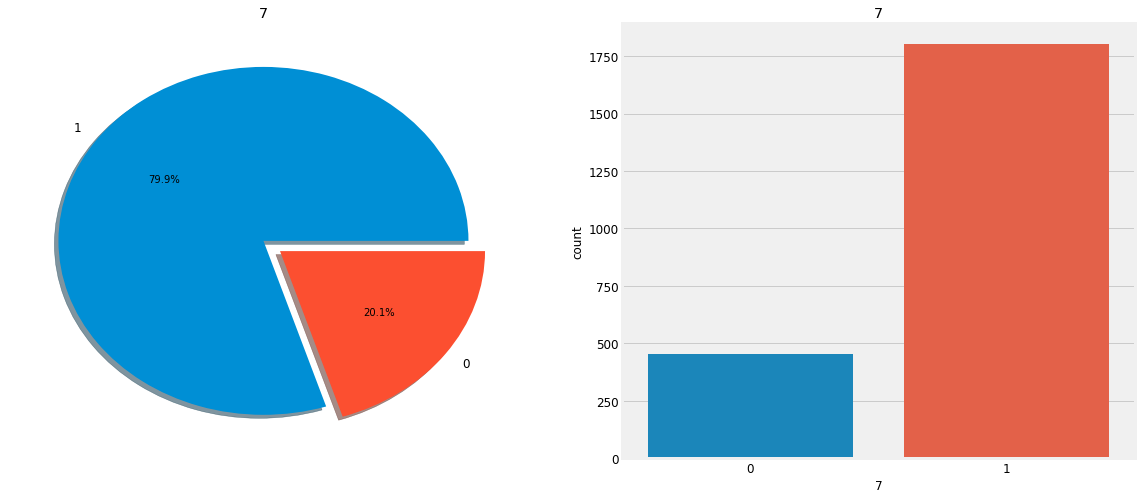

In [10]:

f,ax=plt.subplots(1,2,figsize=(18,8))
data['7'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('7')
ax[0].set_ylabel('')
sns.countplot('7',data=data,ax=ax[1])
ax[1].set_title('7')
plt.show()



### Apply PCA on datasets

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
t=pca.fit_transform(x)


### Plot data on two principle components

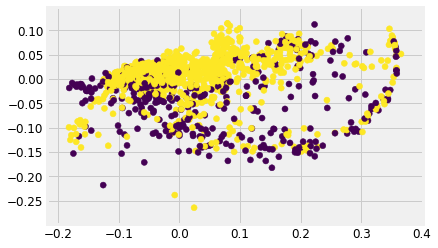

In [12]:
# 2d plot
plt.scatter(t[:,0],t[:,1],c=y)
plt.show()

### Plot data on three principle components

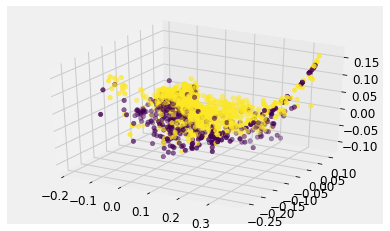

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t[:,0],t[:,1],t[:,2],c=y)
plt.show()

### Plot histogram on six features

#### x-axis represent values of features and y-axis represent frequency

(2254,)


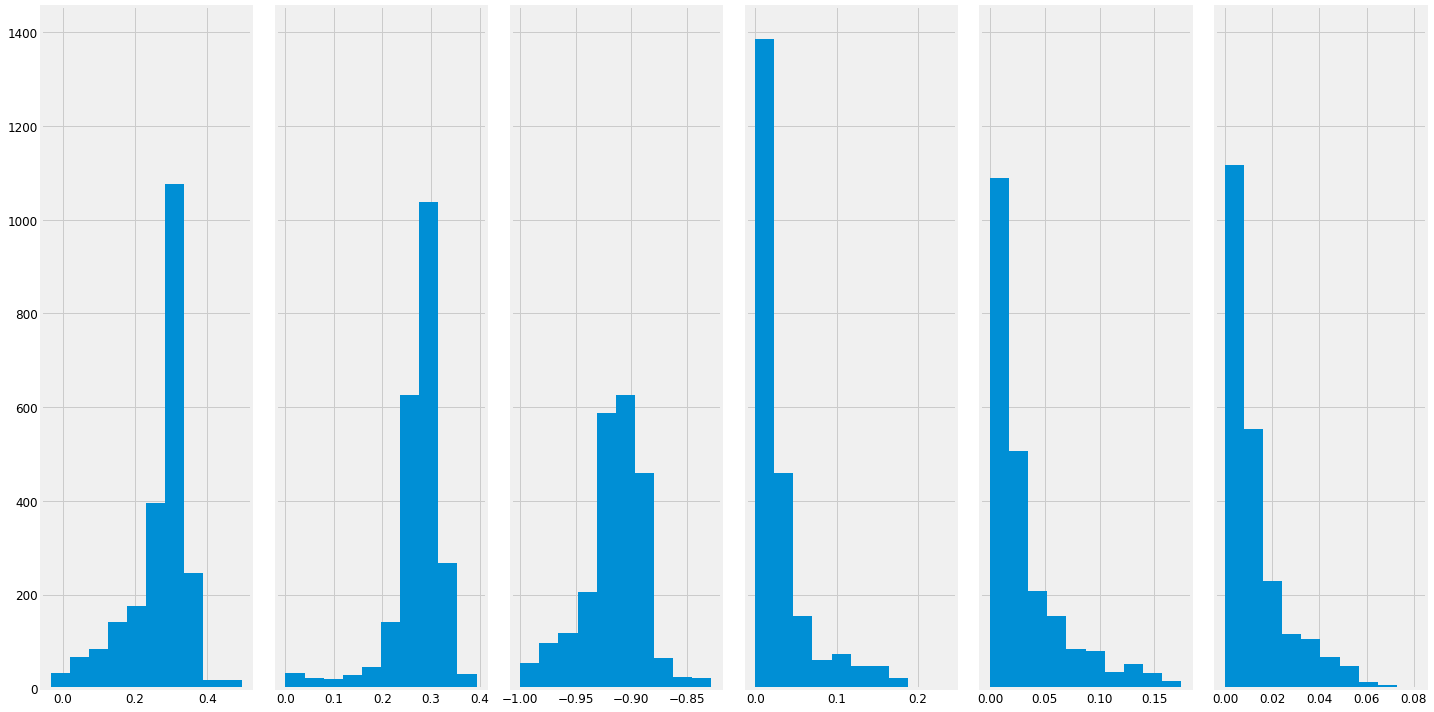

In [16]:
fig, axs = plt.subplots(1, 6, sharey=True, tight_layout=True,figsize=(20, 10))


print(x[:,1].shape)
for i in range(6):
    axs[i].hist(x[:,i])




### Plot categorical value corresponding to all features

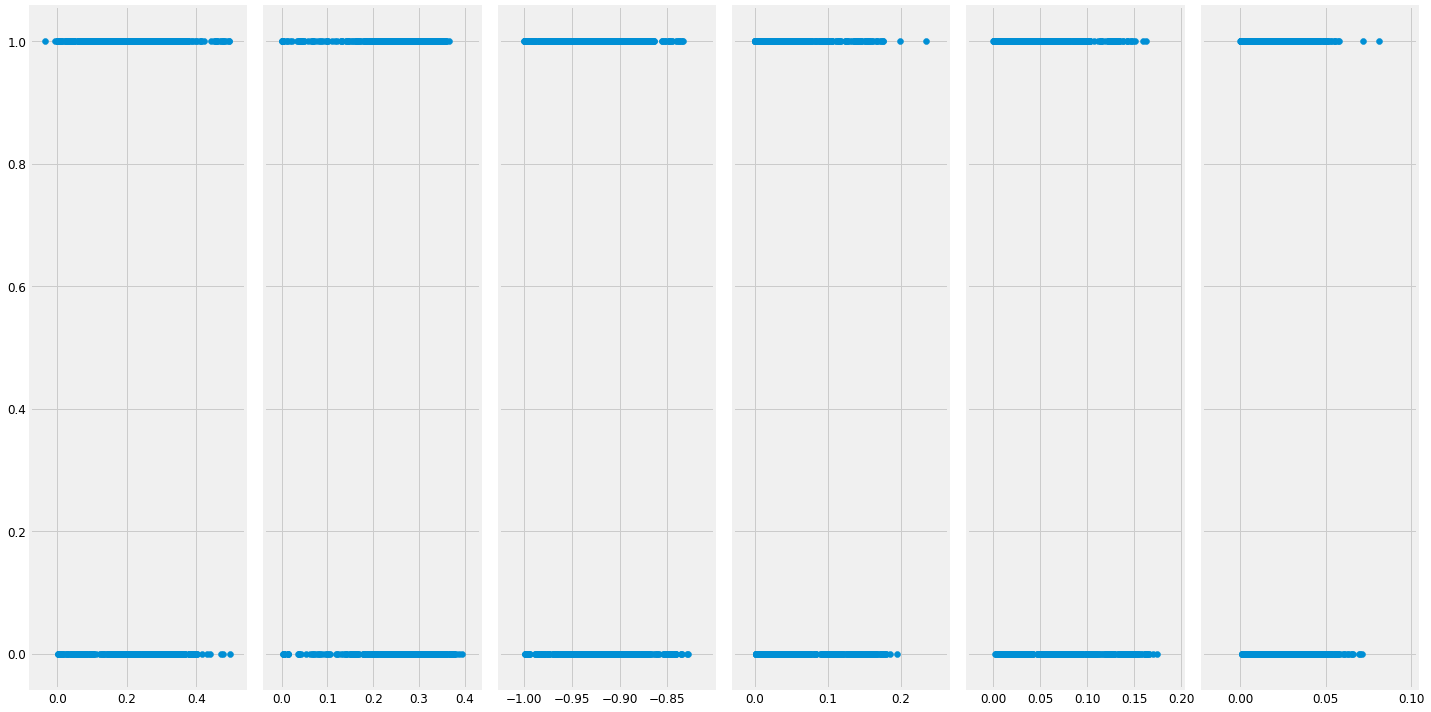

In [17]:
fig, axs = plt.subplots(1, 6, sharey=True, tight_layout=True,figsize=(20, 10))

# We can set the number of bins with the `bins` kwarg

for i in range(6):
    axs[i].scatter(x[:,i],y)



### Plot correlation matrix

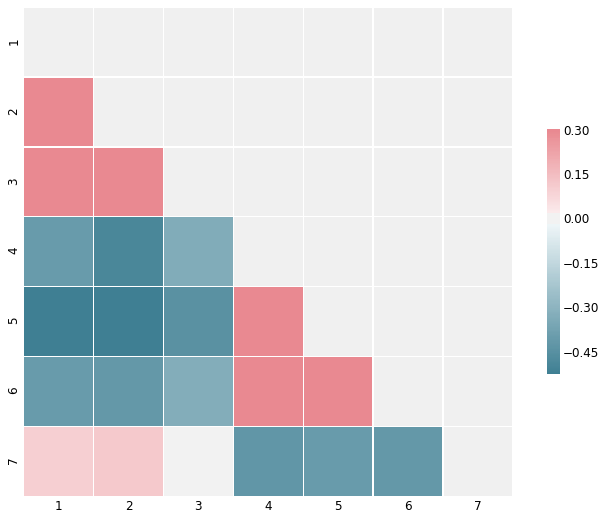

In [107]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Split data into train and test

In [108]:
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

trainy=train['7'].as_matrix()
a=time.clock()
#print(train)
mean=[]
#print(train[train['species']==2].mean().as_matrix())
for i in range(0,2):
    #print(i)
    mean.append(train[train['7']==i].mean().as_matrix())
    #print(mean)

std=[]
for i in range(0,2):
    #print(i)
    std.append(train[train['7']==i].std().as_matrix())

mean=np.array(mean)
std=np.array(std)

mean=np.delete(mean,mean.shape[1]-1,axis=1)
std=np.delete(std,std.shape[1]-1,axis=1)
b=time.clock()
traintime=b-a

y=trainy
trainy=trainy.reshape(trainy.shape[0],1)
trainx=train.drop(['7'],axis=1).as_matrix()

testy=test['7'].as_matrix()
testx=test.drop(['7'],axis=1).as_matrix()

print(trainx.shape)

(1803, 6)


### Define functions

In [109]:
def accuracy(TP,TN,FP,FN):
    return (TP+TN)/(TP+FP+FN+TN)

def precision(TP,FP):
    return TP/(TP+FP)

def recall(TP,TN):
    return TP/(TP+FN)

def f1Score(Recall,Precision):
    return 2*(Recall * Precision) / (Recall + Precision)

## Various Classification algorithm

### Nearest Neighbours

In [110]:
t=[]


x=testx.reshape(testx.shape[0],trainx.shape[1])
for i in range(testx.shape[0]):
    x=testx[i].reshape(1,trainx.shape[1])
    dist = np.linalg.norm(trainx-x,axis=1)
    t.append(trainy[np.where(dist==dist.min())[0]][0])
t=np.array(t)
t=t[:,0]

TP=np.where((t==testy) &(t==1))[0].shape[0]
TN=np.where((t==testy) &(t==0))[0].shape[0]
FP=np.where((t!=testy) &(t==1))[0].shape[0]
FN=np.where((t!=testy) &(t==0))[0].shape[0]
print("TP=",TP," TN=",TN," FP=",FP," FN=",FN)
print("Accuracy=",accuracy(TP,TN,FP,FN))
Precision=precision(TP,FP)
print("Precision=",Precision)
Recall=recall(TP,TN)
print("Recall=",Recall)
print("F1Score=",f1Score(Recall,Precision))
print("training Time=",b-a)

TP= 320  TN= 46  FP= 42  FN= 43
Accuracy= 0.811529933481153
Precision= 0.8839779005524862
Recall= 0.8815426997245179
F1Score= 0.8827586206896553


### Naive Bayes

In [118]:
# naive bayes

def prob(X,mean,std):
   
    z=np.square((X-mean)/std)/2
    
    return np.exp(-z)/(np.sqrt(2*np.pi)*std)


p1=np.where(trainy==0)[0].shape[0]/trainy.shape[0]
p2=np.where(trainy==1)[0].shape[0]/trainy.shape[0]


t=[]
for i in range(testx.shape[0]):
    q1=prob(testx[i],mean[0],std[0]).prod()
    q2=prob(testx[i],mean[1],std[1]).prod()
    t.append(np.argmax([p1*q1,p2*q2]))



t=np.array(t)


TP=np.where((t==testy) &(t==1))[0].shape[0]
TN=np.where((t==testy) &(t==0))[0].shape[0]
FP=np.where((t!=testy) &(t==1))[0].shape[0]
FN=np.where((t!=testy) &(t==0))[0].shape[0]
print("TP=",TP," TN=",TN," FP=",FP," FN=",FN)
print("Accuracy=",accuracy(TP,TN,FP,FN))
Precision=precision(TP,FP)
print("Precision=",Precision)
Recall=recall(TP,TN)
print("Recall=",Recall)
print("F1Score=",f1Score(Recall,Precision))

print("training Time=",traintime)

TP= 312  TN= 46  FP= 42  FN= 51
Accuracy= 0.7937915742793792
Precision= 0.8813559322033898
Recall= 0.859504132231405
F1Score= 0.8702928870292886
training Time= 0.00397638093674108


### Logistic Regression (Library)

In [119]:
# using library logistic regression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
a=time.clock()
lg.fit(trainx,trainy)
t=lg.predict(testx)

b=time.clock()
TP=np.where((t==testy) &(t==1))[0].shape[0]
TN=np.where((t==testy) &(t==0))[0].shape[0]
FP=np.where((t!=testy) &(t==1))[0].shape[0]
FN=np.where((t!=testy) &(t==0))[0].shape[0]
print("TP=",TP," TN=",TN," FP=",FP," FN=",FN)
print("Accuracy=",accuracy(TP,TN,FP,FN))
Precision=precision(TP,FP)
print("Precision=",Precision)
Recall=recall(TP,TN)
print("Recall=",Recall)
print("F1Score=",f1Score(Recall,Precision))
print("training Time=",b-a)

TP= 361  TN= 4  FP= 84  FN= 2
Accuracy= 0.8093126385809313
Precision= 0.8112359550561797
Recall= 0.9944903581267218
F1Score= 0.8935643564356436
training Time= 0.0032298966369808113


### Gradient Descent

In [121]:
#gradient descent


W = 0.01 * np.random.randn(trainx.shape[1],2)
b = np.zeros((1,2))
X=trainx
Y=trainy

# some hyperparameters
step_size = 0.2
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
a=time.clock()
for i in range(10000):
  
  
    scores = np.dot(X, W) + b 
    probs = 1/(1+np.exp(-scores))
    
    dW = np.dot(X.T,(probs-Y))/X.shape[0]
    db=np.sum(probs-Y,axis=0)/X.shape[0]
    
    dW += reg*W 

    W += -step_size * dW
    b += -step_size * db
b=time.clock()

scores = np.dot(testx, W) + b 
exp_scores = np.exp(scores)

probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
t=np.argmax(probs,axis=1)



TP=np.where((t==testy) &(t==1))[0].shape[0]
TN=np.where((t==testy) &(t==0))[0].shape[0]
FP=np.where((t!=testy) &(t==1))[0].shape[0]
FN=np.where((t!=testy) &(t==0))[0].shape[0]
print("TP=",TP," TN=",TN," FP=",FP," FN=",FN)
print("Accuracy=",accuracy(TP,TN,FP,FN))
Precision=precision(TP,FP)
print("Precision=",Precision)
Recall=recall(TP,TN)
print("Recall=",Recall)
print("F1Score=",f1Score(Recall,Precision))

print("training Time=",b-a)

TP= 363  TN= 0  FP= 88  FN= 0
Accuracy= 0.8048780487804879
Precision= 0.8048780487804879
Recall= 1.0
F1Score= 0.8918918918918919
training Time= 1.5896171968507815


### Newtons method

In [124]:

# Newtons method

y=y.astype('int64')



X=np.concatenate((trainx,np.ones((X.shape[0],1))),axis=1)
Y=trainy

W = 0.01 * np.random.randn(X.shape[1],Y.shape[1])

a=time.clock()
scores = np.dot(X, W)

probs = 1/(1+np.exp(-scores))

dW = np.dot(X.T,(probs-Y))/X.shape[0]


H=np.linalg.inv(np.dot(np.dot(X.T,np.diag((probs[:,0]*(1-probs[:,0])))),X))

W += np.dot(H,dW)
   
b=time.clock()

testx1=np.concatenate((testx,np.ones((testx.shape[0],1))),axis=1)
scores = np.dot(testx1, W) 
probs = 1/(1+np.exp(-scores))
#print(probs)
maxv = lambda x: 1 if x[0]>0.5  else 0
t = np.array([maxv(p) for p in probs])


TP=np.where((t==testy) &(t==1))[0].shape[0]
TN=np.where((t==testy) &(t==0))[0].shape[0]
FP=np.where((t!=testy) &(t==1))[0].shape[0]
FN=np.where((t!=testy) &(t==0))[0].shape[0]
print("TP=",TP," TN=",TN," FP=",FP," FN=",FN)
print("Accuracy=",accuracy(TP,TN,FP,FN))
Precision=precision(TP,FP)
print("Precision=",Precision)
Recall=recall(TP,TN)
print("Recall=",Recall)
print("F1Score=",f1Score(Recall,Precision))
print("training Time=",b-a)

TP= 361  TN= 0  FP= 88  FN= 2
Accuracy= 0.8004434589800443
Precision= 0.8040089086859689
Recall= 0.9944903581267218
F1Score= 0.8891625615763548
training Time= 0.008824778699590752
